# DS-SF-30 | Final Project 2: Exploratory Data Analysis

Exploratory Analysis Writeup

A well organized Jupyter notebook with code and fully ran top to bottom.

At least one visual for each independent variable and, if possible, its relationship to your dependent variable.

It's just as important to show what's not correlated as it is to show any actual correlations found.

Visuals should be well labeled and intuitive based on the data types.

For example, if your x variable is temperature and y is "did it rain," a reasonable visual would be two histograms of temperature, one where it rained, and one where it didn't.

Tables are a perfectly valid visualization tool! Interweave them into your work.

Provide insight about dataset and its impact on your hypothesis.

# Import Packages/Libraries

In [180]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as scipy
import scipy.stats as stats
import numpy as np

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 40)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

# Import Data

In [181]:
df = pd.read_csv(os.path.join('..', '..', 'final-project', '2', 'ALL WINE DATA 2014 10 21.csv'))
                  
df.head(10)

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,ProductAttributes/ProductAttribute_Name2,Ratings_HighestScore,Community/Reviews_HighestScore,Appellation_Url,Appellation/Region_Url,Url,Varietal_Url,Varietal/WineType_Url,Vineyard_Url,Vineyard_ImageUrl,Vineyard/GeoLocation_Latitude,Vineyard/GeoLocation_Longitude,Vineyard/GeoLocation_Url,ProductAttributes/ProductAttribute_Url,ProductAttributes/ProductAttribute_ImageUrl,Labels/Label_Id,Labels/Label_Name,Labels/Label_Url,Community_Url,Community/Reviews_HighestScore.1
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,1.430000e+02,Pinot Noir,124.0,Red Wines,8182.0,Argyle,NaN,NaN,NaN,0.0,0.0,http://www.wine.com/v6/Willamette-Valley/wine/...,http://www.wine.com/v6/Oregon/wine/list.aspx?N...,http://www.wine.com/v6/Argyle-Reserve-Pinot-No...,http://www.wine.com/v6/Pinot-Noir/wine/list.as...,http://www.wine.com/v6/Red-Wines/wine/list.asp...,http://www.wine.com/v6/Argyle/learnabout.aspx?...,http://cache.wine.com/aboutwine/basics/images/...,-360.0,-360.0,http://www.wine.com/v6/aboutwine/mapof.aspx?wi...,NaN,NaN,6m,thumbnail,http://cache.wine.com/labels/6m.jpg,http://www.wine.com/v6/Argyle-Reserve-Pinot-No...,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,NaN,NaN,NaN,92.0,0.0,http://www.wine.com/v6/Sonoma-County/wine/list...,http://www.wine.com/v6/California/wine/list.as...,http://www.wine.com/v6/Chalk-Hill-Chardonnay-1...,http://www.wine.com/v6/Chardonnay/wine/list.as...,http://www.wine.com/v6/White-Wines/wine/list.a...,http://www.wine.com/v6/Chalk-Hill-Winery/learn...,http://cache.wine.com/aboutwine/basics/images/...,-360.0,-360.0,http://www.wine.com/v6/aboutwine/mapof.aspx?wi...,NaN,NaN,10m,thumbnail,http://cache.wine.com/labels/10m.jpg,http://www.wine.com/v6/Chalk-Hill-Chardonnay-1...,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,NaN,NaN,NaN,90.0,0.0,http://www.wine.com/v6/Napa-Valley/wine/list.a...,http://www.wine.com/v6/California/wine/list.as...,http://www.wine.com/v6/Franciscan-Chardonnay-1...,http://www.wine.com/v6/Chardonnay/wine/list.as...,http://www.wine.com/v6/White-Wines/wine/list.a...,http://www.wine.com/v6/Franciscan-Oakville-Est...,http://cache.wine.com/aboutwine/basics/images/...,-360.0,-360.0,http://www.wine.com/v6/aboutwine/mapof.aspx?wi...,NaN,NaN,17m,thumbnail,http://cache.wine.com/labels/17m.jpg,http://www.wine.com/v6/Franciscan-Chardonnay-1...,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,NaN,0.0,0.0,http://www.wine.com/v6/North-Coast/wine/list.a...,http://www.wine.com/v6/California/wine/list.as...,http://www.wine.com/v6/Sterling-Chardonnay-199...,http://www.wine.com/v6/Chardonnay/wine/list.as...,http://www.wine.com/v6/White-Wines/wine/list.a...,http://www.wine.com/v6/Sterling-Vineyards/lear...,http://cache.wine.com/aboutwine/basics/images/...,-360.0,-360.0,http://www.wine.com/v6/aboutwine/mapof.aspx?wi...,NaN,NaN,20m,thumbnail,http://cache.wine.com/labels/20m.jpg,http://www.wine.com/v6/Sterling-Chardonnay-199...,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,NaN,NaN,NaN,87.0,0.0,http://www.wine.com/v6/Napa-Valley/wine/list.a...,http://www.wine.com/v6/California/wine/

# Explore data

In [182]:
df.shape

(74025, 40)

In [183]:
df.dtypes

Id                                              object
Name                                            object
Vintage                                         object
Type                                            object
PriceMax                                       float64
PriceMin                                       float64
PriceRetail                                    float64
Appellation_Id                                 float64
Appellation_Name                                object
Appellation/Region_Id                          float64
Appellation/Region_Name                         object
Appelation Country                              object
Varietal_Id                                    float64
Varietal_Name                                   object
Varietal/WineType_Id                           float64
Varietal/WineType_Name                          object
Vineyard_Id                                    float64
Vineyard_Name                                   object
ProductAtt

In [184]:
df.count()

Id                                             74025
Name                                           74024
Vintage                                        72539
Type                                           74004
PriceMax                                       74024
PriceMin                                       74024
PriceRetail                                    74024
Appellation_Id                                 73754
Appellation_Name                               73648
Appellation/Region_Id                          73754
Appellation/Region_Name                        73648
Appelation Country                             73648
Varietal_Id                                    73754
Varietal_Name                                  73751
Varietal/WineType_Id                           73754
Varietal/WineType_Name                         73751
Vineyard_Id                                    73754
Vineyard_Name                                  73754
ProductAttributes/ProductAttribute_Id         

In [185]:
df.isnull().sum()

Id                                                 0
Name                                               1
Vintage                                         1486
Type                                              21
PriceMax                                           1
PriceMin                                           1
PriceRetail                                        1
Appellation_Id                                   271
Appellation_Name                                 377
Appellation/Region_Id                            271
Appellation/Region_Name                          377
Appelation Country                               377
Varietal_Id                                      271
Varietal_Name                                    274
Varietal/WineType_Id                             271
Varietal/WineType_Name                           274
Vineyard_Id                                      271
Vineyard_Name                                    271
ProductAttributes/ProductAttribute_Id         

# Drop NaNs, 0's in price, non-wines and superflous columns

In [186]:
list(df.columns.values)

['Id',
 'Name',
 'Vintage',
 'Type',
 'PriceMax',
 'PriceMin',
 'PriceRetail',
 'Appellation_Id',
 'Appellation_Name',
 'Appellation/Region_Id',
 'Appellation/Region_Name',
 'Appelation Country',
 'Varietal_Id',
 'Varietal_Name',
 'Varietal/WineType_Id',
 'Varietal/WineType_Name',
 'Vineyard_Id',
 'Vineyard_Name',
 'ProductAttributes/ProductAttribute_Id',
 'ProductAttributes/ProductAttribute_Name',
 'ProductAttributes/ProductAttribute_Name2',
 'Ratings_HighestScore',
 'Community/Reviews_HighestScore',
 'Appellation_Url',
 'Appellation/Region_Url',
 'Url',
 'Varietal_Url',
 'Varietal/WineType_Url',
 'Vineyard_Url',
 'Vineyard_ImageUrl',
 'Vineyard/GeoLocation_Latitude',
 'Vineyard/GeoLocation_Longitude',
 'Vineyard/GeoLocation_Url',
 'ProductAttributes/ProductAttribute_Url',
 'ProductAttributes/ProductAttribute_ImageUrl',
 'Labels/Label_Id',
 'Labels/Label_Name',
 'Labels/Label_Url',
 'Community_Url',
 'Community/Reviews_HighestScore.1']

# Dropping columns:


Appellation_Url	
Appellation/Region_Url	
Url	
Varietal_Url	
Varietal/WineType_Url	
Vineyard_Url	
Vineyard_ImageUrl	
Vineyard/GeoLocation_Latitude	
Vineyard/GeoLocation_Longitude	
Vineyard/GeoLocation_Url	
ProductAttributes/ProductAttribute_Url	
ProductAttributes/ProductAttribute_ImageUrl	
Labels/Label_Id	
Labels/Label_Name	
Labels/Label_Url	
Community_Url

In [187]:
df.drop(['Appellation_Url', 'Appellation/Region_Url', 'Url', 'Varietal_Url', 'Varietal/WineType_Url', 'Vineyard_Url', 'Vineyard_ImageUrl', 'Vineyard/GeoLocation_Latitude' , 'Vineyard/GeoLocation_Longitude', 'Vineyard/GeoLocation_Url', 'ProductAttributes/ProductAttribute_Url', 'ProductAttributes/ProductAttribute_ImageUrl', 'Labels/Label_Id', 'Labels/Label_Name', 'Labels/Label_Url', 'Community_Url'], inplace = True, axis = 1)

In [188]:
df

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,ProductAttributes/ProductAttribute_Name2,Ratings_HighestScore,Community/Reviews_HighestScore,Community/Reviews_HighestScore.1
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,1.430000e+02,Pinot Noir,124.0,Red Wines,8182.0,Argyle,NaN,NaN,NaN,0.0,0.0,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,NaN,NaN,NaN,92.0,0.0,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,NaN,NaN,NaN,90.0,0.0,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,NaN,0.0,0.0,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,NaN,NaN,NaN,87.0,0.0,0.0
5,23,Sterling Sauvignon Blanc 1998,1998,Wine,16.990,16.990,16.99,2416.0,North Coast,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,NaN,85.0,0.0,0.0
6,41,Kenwood Sonoma County Sauvignon Blanc 1998,1998,Wine,14.391,14.391,15.99,2371.0,Sonoma County,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8905.0,Kenwood Vineyards,NaN,NaN,NaN,88.0,0.0,0.0
7,45,Chateau St. Jean Merlot 1997,1997,Wine,26.990,26.990,29.99,2371.0,Sonoma County,101.0,California,United States,1.380000e+02,Merlot,124.0,Red Wines,5922.0,Chateau St. Jean,NaN,NaN,NaN,89.0,0.0,0.0
8,50,Pacific Echo Brut Rose,NaN,Wine,28.990,24.990,24.99,2416.0,North Coast,101.0,California,United States,-2.147484e+09,Ros�,123.0,Champagne & Sparkling,8872.0,Pacific Echo,NaN,NaN,NaN,0.0,0.0,0.0
9,52,Chateau St. Jean Belle Terre Chardonnay 1996,1996,Wine,22.041,22.041,24.49,2371.0,Sonoma County,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,5922.0,Chateau St. Jean,NaN,NaN,NaN,91.0,0.0,0.0


In [189]:
df.shape

(74025, 24)

In [190]:
df.dropna(subset = ['PriceMax', 'PriceMin', 'PriceRetail'], inplace = True)

In [191]:
df.shape

(74024, 24)

In [192]:
for col in df:
    print df[col].unique()

[6L 10L 17L ..., '135868' '135869' '135871']
['Argyle Reserve Pinot Noir 1996' 'Chalk Hill Chardonnay 1997'
 'Franciscan Chardonnay 1998' ..., 'Henschke Mt. Edelstone Shiraz 2012'
 'Henschke Hill of Grace Shiraz 2009'
 'Vasse Felix Heytesbury Red Blend 2011']
['1996' '1997' '1998' nan '1995' '2000' '1990' '1993' '1994' '1992' '1991'
 '1989' '1986' '1988' '1977' ' Dry' '1999' '1984' '1982' '1980' '1985'
 '1983' '1968' '1979' '1978' '1970' '1971' '1961' '1975' '1967' '1966'
 '1950' '1953' '0ML)' '1937' '1941' '1964' '1974' '1976' '1981' ' Red'
 '1987' ' ML)' '0ml)' '1972' '2001' '.5L)' '2005' '1912' '1963' '.8L)'
 ' Cru' ' Dog' '/78)' '/80)' '1973' '.0L)' ' Box' '2011' '2002' '2008'
 '1933' '1962' '1945' '1921' '1955' '1958' ' ml)' ' Sky' '1954' '2010'
 '1922' ' Lee' '1959' '2009' '2003' '2004' ' Ina' '1940' '2007' '1910'
 '1934' ' N/V' '2006' '1944' ' Tin' '* *' ' Set' '1948' ' DOC' ' VII'
 '2012' ' Kit' '(II)' '1952' '1969' '2013' ' IGT' ' Bag' '1908' ' Mat'
 ' E-2' ' F-2' ' I-1' '2014

In [193]:
df = df[df.Type == 'Wine']

In [194]:
df.shape

(73794, 24)

In [195]:
df.Type.unique()

array(['Wine'], dtype=object)

In [196]:
df['Varietal/WineType_Name'].unique()

array(['Red Wines', 'White Wines', 'Champagne & Sparkling', 'Ros\xe9 Wine',
       'Dessert, Fortified & Fruit Wines', 'Sake', 'Liqueur', 'Tequila',
       nan, 'Whisky', 'Vodka', 'Brandy'], dtype=object)

In [197]:
df['Varietal/WineType_Name'].nunique()

11

In [198]:
df['Varietal/WineType_Name'].value_counts()

Red Wines                           47408
White Wines                         21632
Champagne & Sparkling                1844
Dessert, Fortified & Fruit Wines     1705
Ros� Wine                            1083
Sake                                   71
Tequila                                 2
Liqueur                                 2
Whisky                                  2
Brandy                                  1
Vodka                                   1
Name: Varietal/WineType_Name, dtype: int64

In [199]:
df = df[~df['Varietal/WineType_Name'].isin(['Sake', 'Liqueur', 'Tequila', 'Whisky', 'Vodka', 'Brandy', ''])]

In [200]:
df.shape

(73715, 24)

In [201]:
df.isnull().sum()

Id                                              0
Name                                            0
Vintage                                      1290
Type                                            0
PriceMax                                        0
PriceMin                                        0
PriceRetail                                     0
Appellation_Id                                 40
Appellation_Name                              132
Appellation/Region_Id                          40
Appellation/Region_Name                       132
Appelation Country                            132
Varietal_Id                                    40
Varietal_Name                                  43
Varietal/WineType_Id                           40
Varietal/WineType_Name                         43
Vineyard_Id                                    40
Vineyard_Name                                  40
ProductAttributes/ProductAttribute_Id       39637
ProductAttributes/ProductAttribute_Name     39637


# Suspect duplication of columns - check for correlation before dropping 

In [202]:
df[['Community/Reviews_HighestScore', 'Community/Reviews_HighestScore.1']].corr()

,Community/Reviews_HighestScore,Community/Reviews_HighestScore.1
Community/Reviews_HighestScore,1.0,1.0
Community/Reviews_HighestScore.1,1.0,1.0


In [203]:
df.drop('Community/Reviews_HighestScore.1', axis = 1, inplace = True)

list(df.columns.values)

['Id',
 'Name',
 'Vintage',
 'Type',
 'PriceMax',
 'PriceMin',
 'PriceRetail',
 'Appellation_Id',
 'Appellation_Name',
 'Appellation/Region_Id',
 'Appellation/Region_Name',
 'Appelation Country',
 'Varietal_Id',
 'Varietal_Name',
 'Varietal/WineType_Id',
 'Varietal/WineType_Name',
 'Vineyard_Id',
 'Vineyard_Name',
 'ProductAttributes/ProductAttribute_Id',
 'ProductAttributes/ProductAttribute_Name',
 'ProductAttributes/ProductAttribute_Name2',
 'Ratings_HighestScore',
 'Community/Reviews_HighestScore']

In [204]:
df['ProductAttributes/ProductAttribute_Name'].unique()

array([nan, 'Collectible Wines', 'Great Bottles to Give', 'Big & Bold',
       'Champagne Gifts', 'Business Gifts', 'Green Wines', 'Sweet Wine',
       'Boutique Wines', 'Kosher Wines', 'Fruity & Smooth',
       'Older Vintages', 'Screw Cap Wines', 'Smooth & Supple',
       'Earthy & Spicy', 'Light & Fruity', 'Rich & Creamy',
       'Light & Crisp', 'Wedding', 'Has Video', 'Gifts for Her',
       'Charitable Wine', 'Wine Gift Sets', 'Bordeaux Futures'], dtype=object)

In [205]:
df['ProductAttributes/ProductAttribute_Name2'].unique()

array([nan, 'Big & Bold', 'Fruity & Smooth', 'Smooth & Supple',
       'Earthy & Spicy', 'Light & Fruity', 'Rich & Creamy', 'Light & Crisp'], dtype=object)

In [206]:
df_subset = df[df['ProductAttributes/ProductAttribute_Name'].notnull() & df['ProductAttributes/ProductAttribute_Name2'].notnull()]

df_subset[['ProductAttributes/ProductAttribute_Name','ProductAttributes/ProductAttribute_Name2']]

,ProductAttributes/ProductAttribute_Name,ProductAttributes/ProductAttribute_Name2
84,Big & Bold,Big & Bold
512,Fruity & Smooth,Fruity & Smooth
612,Big & Bold,Big & Bold
1318,Big & Bold,Big & Bold
2653,Smooth & Supple,Smooth & Supple
3186,Smooth & Supple,Smooth & Supple
4243,Smooth & Supple,Smooth & Supple
4394,Big & Bold,Big & Bold
4463,Earthy & Spicy,Earthy & Spicy
5601,Light & Fruity,Light & Fruity


In [207]:
(df_subset['ProductAttributes/ProductAttribute_Name'] == df_subset['ProductAttributes/ProductAttribute_Name2']).unique()

array([True], dtype=object)

In [208]:
df.drop('ProductAttributes/ProductAttribute_Name2', axis = 1, inplace = True)

list(df.columns.values)

['Id',
 'Name',
 'Vintage',
 'Type',
 'PriceMax',
 'PriceMin',
 'PriceRetail',
 'Appellation_Id',
 'Appellation_Name',
 'Appellation/Region_Id',
 'Appellation/Region_Name',
 'Appelation Country',
 'Varietal_Id',
 'Varietal_Name',
 'Varietal/WineType_Id',
 'Varietal/WineType_Name',
 'Vineyard_Id',
 'Vineyard_Name',
 'ProductAttributes/ProductAttribute_Id',
 'ProductAttributes/ProductAttribute_Name',
 'Ratings_HighestScore',
 'Community/Reviews_HighestScore']

In [209]:
df['Vintage'].unique()

array(['1996', '1997', '1998', nan, '1995', '2000', '1990', '1993', '1994',
       '1992', '1991', '1989', '1986', '1988', '1977', ' Dry', '1999',
       '1984', '1982', '1980', '1985', '1983', '1968', '1979', '1978',
       '1970', '1971', '1961', '1975', '1967', '1966', '1950', '1953',
       '0ML)', '1937', '1941', '1964', '1974', '1976', '1981', ' Red',
       '1987', ' ML)', '0ml)', '1972', '2001', '.5L)', '2005', '1912',
       '1963', ' Cru', ' Dog', '/78)', '/80)', '1973', '.0L)', ' Box',
       '2011', '2002', '2008', '1933', '1962', '1945', '1921', '1955',
       '1958', ' ml)', '1954', '2010', '1922', ' Lee', '1959', '2009',
       '2003', '2004', ' Ina', '1940', '2007', '1910', '1934', ' N/V',
       '2006', '1944', '* *', ' Set', '1948', ' DOC', ' VII', '2012',
       '(II)', '1952', '1969', '2013', ' IGT', ' Bag', '1908', ' E-2',
       ' F-2', ' I-1', '2014'], dtype=object)

In [210]:
df['Appellation_Name'].unique()

array(['Willamette Valley', 'Sonoma County', 'Napa Valley', 'North Coast',
       'Columbia Valley', 'Carneros', 'Central Coast', 'Other California',
       'Russian River', 'Yakima Valley', 'Champagne', 'Other Australia',
       'Barossa Valley', 'Coonawarra', 'Hunter Valley', 'Margaux', 'Medoc',
       'Burgundy', 'Alsace', 'Chateauneuf-du-Pape', 'Cotes du Rhone',
       'Trentino-Alto Adige', 'Southern Italy', 'Friuli-Venezia Giulia',
       'Tuscany', 'Veneto', 'Chile', 'Piedmont', 'Other Bordeaux',
       'South Africa', 'Rogue River Valley', 'Mosel-Saar-Ruwer',
       'Other German', 'Other Spain', 'Portugal', 'Pessac-Leognan',
       'Pauillac', 'South Australia', 'Other Oregon', 'Rioja', 'Condrieu',
       'McLaren Vale', 'Other New Zealand', 'St. Estephe',
       'Walla Walla Valley', 'Umpqua Valley', 'Victoria',
       'Sierra Foothills', 'Hermitage', 'Cote Rotie', 'Virginia',
       'Beaujolais', 'Sauternes and Barsac', 'Other French',
       'Languedoc-Roussillon', 'Argenti

In [211]:
df['Appellation/Region_Name'].unique()

array(['Oregon', 'California', 'Washington', 'France - Other regions',
       'Australia', 'France - Bordeaux', 'France - Rhone', 'Italy',
       'South America', 'South Africa', 'Germany', 'Spain', 'Portugal',
       'New Zealand', 'Other US', 'Unknown', 'Other Europe', 'Israel',
       'Greece', nan, 'Canada', 'Japan', 'Mexico'], dtype=object)

In [212]:
df['Appelation Country'].unique()

array(['United States', 'France', 'Australia', 'Italy', 'South America',
       'South Africa', 'Germany', 'Spain', 'Portugal', 'New Zealand',
       'Unknown', 'Other Europe', 'Israel', 'Greece', nan, 'Canada',
       'Japan', 'Mexico'], dtype=object)

In [213]:
df['Varietal_Name'].unique()

array(['Pinot Noir', 'Chardonnay', 'Sauvignon Blanc', 'Merlot', 'Ros\xe9',
       'Cabernet Sauvignon', 'Pinot Gris/Grigio', 'Bordeaux Red Blends',
       'Zinfandel', 'Riesling', 'Vintage', 'Non-Vintage', 'Sangiovese',
       'Syrah/Shiraz', 'Rhone Red Blends', 'Other Red Blends',
       'Other White Blends', 'Other Red Wine', 'Viognier', 'Pinot Blanc',
       'Gamay', 'Chenin Blanc', 'Nebbiolo', 'Rose', 'Gewurztraminer',
       'Rhone White Blends', 'Other White Wine', 'Pinotage',
       'Other Dessert', 'Muscat', 'Barbera', 'Sherry', 'Madeira', 'Port',
       'Vermouth', 'Tempranillo', 'Bordeaux White Blends', 'Petite Sirah',
       'Cabernet Franc', 'Mourvedre', 'Malbec', 'Fruit Wine', 'Dolcetto',
       'Semillon', 'Grenache', "Nero d'Avola", 'Primitivo', 'Albarino',
       'Carmenere', 'Gruner Veltliner', 'Torrontes', nan, 'Chianti'], dtype=object)

In [214]:
df['Varietal/WineType_Name'].unique()

array(['Red Wines', 'White Wines', 'Champagne & Sparkling', 'Ros\xe9 Wine',
       'Dessert, Fortified & Fruit Wines', nan], dtype=object)

In [215]:
df['Vineyard_Name'].unique()

array(['Argyle', 'Chalk Hill Winery', 'Franciscan Oakville Estate', ...,
       'Comte Armand Les Domaine des Epeneaux', 'Haegelen-Jayer',
       'Kobalt Wines'], dtype=object)

In [216]:
df['Ratings_HighestScore'].unique()

array([   0.,   92.,   90.,   87.,   85.,   88.,   89.,   91.,   93.,
         86.,   95.,   94.,   96.,  100.,   97.,   99.,   98.,   84.])

In [217]:
df['Community/Reviews_HighestScore'].unique()

array([ 0.,  4.,  5.,  3.,  2.,  1.])

In [218]:
df.isnull().sum()

Id                                             0
Name                                           0
Vintage                                     1290
Type                                           0
PriceMax                                       0
PriceMin                                       0
PriceRetail                                    0
Appellation_Id                                40
Appellation_Name                             132
Appellation/Region_Id                         40
Appellation/Region_Name                      132
Appelation Country                           132
Varietal_Id                                   40
Varietal_Name                                 43
Varietal/WineType_Id                          40
Varietal/WineType_Name                        43
Vineyard_Id                                   40
Vineyard_Name                                 40
ProductAttributes/ProductAttribute_Id      39637
ProductAttributes/ProductAttribute_Name    39637
Ratings_HighestScore

In [219]:
df.apply(pd.Series.nunique)

Id                                         70372
Name                                       69732
Vintage                                       99
Type                                           1
PriceMax                                    1917
PriceMin                                    1465
PriceRetail                                 1088
Appellation_Id                               104
Appellation_Name                             107
Appellation/Region_Id                         22
Appellation/Region_Name                       22
Appelation Country                            17
Varietal_Id                                   51
Varietal_Name                                 52
Varietal/WineType_Id                           6
Varietal/WineType_Name                         5
Vineyard_Id                                 5644
Vineyard_Name                               5639
ProductAttributes/ProductAttribute_Id         14
ProductAttributes/ProductAttribute_Name       23
Ratings_HighestScore

In [220]:
df.describe()

,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation/Region_Id,Varietal_Id,Varietal/WineType_Id,Vineyard_Id,ProductAttributes/ProductAttribute_Id,Ratings_HighestScore,Community/Reviews_HighestScore
count,73715.000000,73715.000000,73715.000000,7.367500e+04,7.367500e+04,7.367500e+04,7.367500e+04,7.367500e+04,34078.000000,73715.000000,73715.000000
mean,127.073581,44.384039,49.492546,-1.407496e+07,-2.826460e+06,-3.658003e+07,-8.731981e+04,1.628683e+08,465.076237,42.796622,0.885763
std,877.570593,150.961092,161.267831,1.733081e+08,7.787045e+07,2.778843e+08,1.370328e+07,4.024102e+08,1066.571686,45.655443,1.766549
min,0.000000,0.000000,0.000000,-2.147484e+09,-2.147484e+09,-2.147484e+09,-2.147484e+09,-2.147484e+09,0.000000,0.000000,0.000000
25%,15.990000,12.990000,14.990000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,23.990000,19.990000,21.990000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,46.990000,37.990000,42.490000,NaN,NaN,NaN,NaN,NaN,NaN,91.000000,0.000000
max,61200.000000,12819.000000,12819.000000,1.007800e+04,1.542700e+04,1.011300e+04,1.280000e+02,9.999999e+08,15419.000000,100.000000,5.000000


In [221]:
df['Vintage'] = df['Vintage'].fillna('3000')

df['Vintage'].unique()

array(['1996', '1997', '1998', '3000', '1995', '2000', '1990', '1993',
       '1994', '1992', '1991', '1989', '1986', '1988', '1977', ' Dry',
       '1999', '1984', '1982', '1980', '1985', '1983', '1968', '1979',
       '1978', '1970', '1971', '1961', '1975', '1967', '1966', '1950',
       '1953', '0ML)', '1937', '1941', '1964', '1974', '1976', '1981',
       ' Red', '1987', ' ML)', '0ml)', '1972', '2001', '.5L)', '2005',
       '1912', '1963', ' Cru', ' Dog', '/78)', '/80)', '1973', '.0L)',
       ' Box', '2011', '2002', '2008', '1933', '1962', '1945', '1921',
       '1955', '1958', ' ml)', '1954', '2010', '1922', ' Lee', '1959',
       '2009', '2003', '2004', ' Ina', '1940', '2007', '1910', '1934',
       ' N/V', '2006', '1944', '* *', ' Set', '1948', ' DOC', ' VII',
       '2012', '(II)', '1952', '1969', '2013', ' IGT', ' Bag', '1908',
       ' E-2', ' F-2', ' I-1', '2014'], dtype=object)

In [222]:
df.isnull().sum()

Id                                             0
Name                                           0
Vintage                                        0
Type                                           0
PriceMax                                       0
PriceMin                                       0
PriceRetail                                    0
Appellation_Id                                40
Appellation_Name                             132
Appellation/Region_Id                         40
Appellation/Region_Name                      132
Appelation Country                           132
Varietal_Id                                   40
Varietal_Name                                 43
Varietal/WineType_Id                          40
Varietal/WineType_Name                        43
Vineyard_Id                                   40
Vineyard_Name                                 40
ProductAttributes/ProductAttribute_Id      39637
ProductAttributes/ProductAttribute_Name    39637
Ratings_HighestScore

In [223]:
df

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,1.430000e+02,Pinot Noir,124.0,Red Wines,8182.0,Argyle,NaN,NaN,0.0,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8680.0,Chalk Hill Winery,NaN,NaN,92.0,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8800.0,Franciscan Oakville Estate,NaN,NaN,90.0,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,0.0,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8844.0,Robert Mondavi Winery,NaN,NaN,87.0,0.0
5,23,Sterling Sauvignon Blanc 1998,1998,Wine,16.990,16.990,16.99,2416.0,North Coast,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8074.0,Sterling Vineyards,NaN,NaN,85.0,0.0
6,41,Kenwood Sonoma County Sauvignon Blanc 1998,1998,Wine,14.391,14.391,15.99,2371.0,Sonoma County,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8905.0,Kenwood Vineyards,NaN,NaN,88.0,0.0
7,45,Chateau St. Jean Merlot 1997,1997,Wine,26.990,26.990,29.99,2371.0,Sonoma County,101.0,California,United States,1.380000e+02,Merlot,124.0,Red Wines,5922.0,Chateau St. Jean,NaN,NaN,89.0,0.0
8,50,Pacific Echo Brut Rose,3000,Wine,28.990,24.990,24.99,2416.0,North Coast,101.0,California,United States,-2.147484e+09,Ros�,123.0,Champagne & Sparkling,8872.0,Pacific Echo,NaN,NaN,0.0,0.0
9,52,Chateau St. Jean Belle Terre Chardonnay 1996,1996,Wine,22.041,22.041,24.49,2371.0,Sonoma County,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,5922.0,Chateau St. Jean,NaN,NaN,91.0,0.0


In [224]:
df[df['Vintage'] == {' ML)', '0ml)', '.5L)', ' Cru', ' Dog', '/78)', '/80)', '.0L)', ' Box', 
                ' ml)', ' Lee', ' Ina', ' N/V', '* *', ' Set', ' DOC', ' VII', '(II)', ' IGT', ' Bag',
                ' E-2', ' F-2', ' I-1'}]

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore


In [225]:
df[(df['Vintage'] > 1900) & (df['Vintage'] < 2017)]

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore


In [226]:
df[(df['Vintage'] == ' ML)')]

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
2111,8454,Churchill's 10 Year Old Tawny Port (500 ML),ML),Wine,44.99,18.99,35.99,2377.0,Portugal,107.0,Portugal,Portugal,155.0,Port,128.0,"Dessert, Fortified & Fruit Wines",999999774.0,Churchill's,NaN,NaN,94.0,5.0


In [227]:
vintage_na = df[df['Vintage'].isin([' ML)', '0ml)','0ML)', '.5L)', ' Cru', ' Dog', '/78)', '/80)', '.0L)', ' Box', 
                ' ml)', ' Lee', ' Ina', ' N/V', 'N/V', '* *', ' Set', ' DOC', ' VII', '(II)', ' IGT', ' Bag',
                ' E-2', ' F-2', ' I-1', '3000'])]

vintage_na

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
8,50,Pacific Echo Brut Rose,3000,Wine,28.99,24.990,24.99,2.416000e+03,North Coast,1.010000e+02,California,United States,-2.147484e+09,Ros�,123.0,Champagne & Sparkling,8.872000e+03,Pacific Echo,NaN,NaN,0.0,0.0
63,267,Pacific Echo Brut,3000,Wine,24.99,13.990,17.99,2.416000e+03,North Coast,1.010000e+02,California,United States,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,8.872000e+03,Pacific Echo,NaN,NaN,89.0,4.0
64,270,Mumm Napa Brut Prestige,3000,Wine,2369.00,16.990,22.00,2.398000e+03,Napa Valley,1.010000e+02,California,United States,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,6.113000e+03,Mumm Napa,NaN,NaN,91.0,5.0
65,273,Domaine Chandon Brut Classic,3000,Wine,2339.00,15.790,22.00,2.388000e+03,Other California,1.010000e+02,California,United States,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,5.970000e+03,Domaine Chandon,NaN,NaN,89.0,5.0
67,275,Domaine Chandon Etoile,3000,Wine,39.99,27.990,29.99,2.398000e+03,Napa Valley,1.010000e+02,California,United States,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,5.970000e+03,Domaine Chandon,NaN,NaN,93.0,4.0
68,277,Gloria Ferrer Blanc de Noirs,3000,Wine,2559.00,17.790,22.00,2.454000e+03,Carneros,1.010000e+02,California,United States,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,8.796000e+03,Gloria Ferrer Caves & Vineyards,NaN,NaN,90.0,5.0
128,511,Domaine Chandon Blanc de Noirs,3000,Wine,26.99,8.991,22.00,2.454000e+03,Carneros,1.010000e+02,California,United States,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,5.970000e+03,Domaine Chandon,NaN,NaN,89.0,5.0
130,513,Bollinger Brut Special Cuvee,3000,Wine,79.99,37.990,75.00,2.331000e+03,Champagne,1.020000e+02,France - Other regions,France,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,8.366000e+03,Champagne Bollinger,15419.0,Champagne Gifts,93.0,5.0
132,517,Moet & Chandon White Star,3000,Wine,59.99,7.990,41.99,2.331000e+03,Champagne,1.020000e+02,France - Other regions,France,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,8.758000e+03,Mo�t & Chandon,0.0,Business Gifts,89.0,5.0
133,518,Mumm Brut Cordon Rouge,3000,Wine,4689.00,19.990,44.99,2.331000e+03,Champagne,1.020000e+02,France - Other regions,France,1.820000e+02,Non-Vintage,123.0,Champagne & Sparkling,8.521000e+03,G.H. Mumm,NaN,NaN,92.0,5.0


In [228]:
vintage_na[['Vintage', 'Varietal_Name']]

,Vintage,Varietal_Name
8,3000,Ros�
63,3000,Non-Vintage
64,3000,Non-Vintage
65,3000,Non-Vintage
67,3000,Non-Vintage
68,3000,Non-Vintage
128,3000,Non-Vintage
130,3000,Non-Vintage
132,3000,Non-Vintage
133,3000,Non-Vintage


In [229]:
vintage_na.groupby(['Vintage', 'Varietal_Name'])['Appellation_Id'].count()

Vintage  Varietal_Name        
 Bag     Non-Vintage                1
 Box     Non-Vintage                2
         Ros�                       2
 Cru     Non-Vintage               10
         Ros�                       3
         Vintage                    3
 DOC     Non-Vintage                2
 Dog     Other Red Blends           1
 E-2     Other Red Blends           1
 F-2     Other Red Blends           1
 I-1     Other Red Blends           1
 IGT     Non-Vintage                1
 Ina     Sherry                     1
 Lee     Other Red Blends           1
 ML)     Port                       1
 N/V     Other Red Blends           1
 Set     Non-Vintage                1
 VII     Other Red Blends           1
 ml)     Fruit Wine                 1
         Non-Vintage                1
         Ros�                       1
(II)     Other Red Blends           1
* *      Muscat                     1
.0L)     Non-Vintage                2
         Vintage                    1
.5L)     Non-Vintag

In [230]:
df['Vintage'] = df['Vintage'].replace([' ML)', '0ml)','0ML)', '.5L)', ' Cru', ' Dog', '/78)', '/80)', '.0L)', ' Box', 
                ' ml)', ' Lee', ' Ina', ' N/V', 'N/V', '* *', ' Set', ' DOC', ' VII', '(II)', ' IGT', ' Bag',
                ' E-2', ' F-2', ' I-1', ' Red', ' Dry'], '3000')

df['Vintage'].unique()

array(['1996', '1997', '1998', '3000', '1995', '2000', '1990', '1993',
       '1994', '1992', '1991', '1989', '1986', '1988', '1977', '1999',
       '1984', '1982', '1980', '1985', '1983', '1968', '1979', '1978',
       '1970', '1971', '1961', '1975', '1967', '1966', '1950', '1953',
       '1937', '1941', '1964', '1974', '1976', '1981', '1987', '1972',
       '2001', '2005', '1912', '1963', '1973', '2011', '2002', '2008',
       '1933', '1962', '1945', '1921', '1955', '1958', '1954', '2010',
       '1922', '1959', '2009', '2003', '2004', '1940', '2007', '1910',
       '1934', '2006', '1944', '1948', '2012', '1952', '1969', '2013',
       '1908', '2014'], dtype=object)

In [231]:
sorted(df['Vintage'].unique())

['1908',
 '1910',
 '1912',
 '1921',
 '1922',
 '1933',
 '1934',
 '1937',
 '1940',
 '1941',
 '1944',
 '1945',
 '1948',
 '1950',
 '1952',
 '1953',
 '1954',
 '1955',
 '1958',
 '1959',
 '1961',
 '1962',
 '1963',
 '1964',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '3000']

In [232]:
df['Vintage'].dtype

dtype('O')

In [233]:
df.isnull().sum()

Id                                             0
Name                                           0
Vintage                                        0
Type                                           0
PriceMax                                       0
PriceMin                                       0
PriceRetail                                    0
Appellation_Id                                40
Appellation_Name                             132
Appellation/Region_Id                         40
Appellation/Region_Name                      132
Appelation Country                           132
Varietal_Id                                   40
Varietal_Name                                 43
Varietal/WineType_Id                          40
Varietal/WineType_Name                        43
Vineyard_Id                                   40
Vineyard_Name                                 40
ProductAttributes/ProductAttribute_Id      39637
ProductAttributes/ProductAttribute_Name    39637
Ratings_HighestScore

In [234]:
sorted(df['ProductAttributes/ProductAttribute_Id'].unique())

[nan,
 0.0,
 36.0,
 38.0,
 43.0,
 44.0,
 506.0,
 610.0,
 611.0,
 612.0,
 613.0,
 614.0,
 615.0,
 616.0,
 15419.0]

In [235]:
sorted(df['ProductAttributes/ProductAttribute_Name'].unique())

[nan,
 'Big & Bold',
 'Bordeaux Futures',
 'Boutique Wines',
 'Business Gifts',
 'Champagne Gifts',
 'Charitable Wine',
 'Collectible Wines',
 'Earthy & Spicy',
 'Fruity & Smooth',
 'Gifts for Her',
 'Great Bottles to Give',
 'Green Wines',
 'Has Video',
 'Kosher Wines',
 'Light & Crisp',
 'Light & Fruity',
 'Older Vintages',
 'Rich & Creamy',
 'Screw Cap Wines',
 'Smooth & Supple',
 'Sweet Wine',
 'Wedding',
 'Wine Gift Sets']

In [236]:
df['ProductAttributes/ProductAttribute_Id'] = df['ProductAttributes/ProductAttribute_Id'].fillna(0.0)

df['ProductAttributes/ProductAttribute_Name'] = df['ProductAttributes/ProductAttribute_Name'].fillna('Not Available')

In [237]:
df[df['ProductAttributes/ProductAttribute_Name'] == 'Not Available']

,Id,Name,Vintage,Type,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation_Name,Appellation/Region_Id,Appellation/Region_Name,Appelation Country,Varietal_Id,Varietal_Name,Varietal/WineType_Id,Varietal/WineType_Name,Vineyard_Id,Vineyard_Name,ProductAttributes/ProductAttribute_Id,ProductAttributes/ProductAttribute_Name,Ratings_HighestScore,Community/Reviews_HighestScore
0,6,Argyle Reserve Pinot Noir 1996,1996,Wine,31.990,31.990,31.99,2474.0,Willamette Valley,103.0,Oregon,United States,1.430000e+02,Pinot Noir,124.0,Red Wines,8.182000e+03,Argyle,0.0,Not Available,0.0,0.0
1,10,Chalk Hill Chardonnay 1997,1997,Wine,47.990,31.990,34.99,2371.0,Sonoma County,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8.680000e+03,Chalk Hill Winery,0.0,Not Available,92.0,0.0
2,17,Franciscan Chardonnay 1998,1998,Wine,17.991,17.991,19.99,2398.0,Napa Valley,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8.800000e+03,Franciscan Oakville Estate,0.0,Not Available,90.0,0.0
3,20,Sterling Chardonnay 1998,1998,Wine,23.990,19.990,23.99,2416.0,North Coast,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,8.074000e+03,Sterling Vineyards,0.0,Not Available,0.0,0.0
4,22,Robert Mondavi Fume Blanc 1997,1997,Wine,15.990,15.990,15.99,2398.0,Napa Valley,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8.844000e+03,Robert Mondavi Winery,0.0,Not Available,87.0,0.0
5,23,Sterling Sauvignon Blanc 1998,1998,Wine,16.990,16.990,16.99,2416.0,North Coast,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8.074000e+03,Sterling Vineyards,0.0,Not Available,85.0,0.0
6,41,Kenwood Sonoma County Sauvignon Blanc 1998,1998,Wine,14.391,14.391,15.99,2371.0,Sonoma County,101.0,California,United States,1.510000e+02,Sauvignon Blanc,125.0,White Wines,8.905000e+03,Kenwood Vineyards,0.0,Not Available,88.0,0.0
7,45,Chateau St. Jean Merlot 1997,1997,Wine,26.990,26.990,29.99,2371.0,Sonoma County,101.0,California,United States,1.380000e+02,Merlot,124.0,Red Wines,5.922000e+03,Chateau St. Jean,0.0,Not Available,89.0,0.0
8,50,Pacific Echo Brut Rose,3000,Wine,28.990,24.990,24.99,2416.0,North Coast,101.0,California,United States,-2.147484e+09,Ros�,123.0,Champagne & Sparkling,8.872000e+03,Pacific Echo,0.0,Not Available,0.0,0.0
9,52,Chateau St. Jean Belle Terre Chardonnay 1996,1996,Wine,22.041,22.041,24.49,2371.0,Sonoma County,101.0,California,United States,1.400000e+02,Chardonnay,125.0,White Wines,5.922000e+03,Chateau St. Jean,0.0,Not Available,91.0,0.0


In [238]:
df.isnull().sum()

Id                                           0
Name                                         0
Vintage                                      0
Type                                         0
PriceMax                                     0
PriceMin                                     0
PriceRetail                                  0
Appellation_Id                              40
Appellation_Name                           132
Appellation/Region_Id                       40
Appellation/Region_Name                    132
Appelation Country                         132
Varietal_Id                                 40
Varietal_Name                               43
Varietal/WineType_Id                        40
Varietal/WineType_Name                      43
Vineyard_Id                                 40
Vineyard_Name                               40
ProductAttributes/ProductAttribute_Id        0
ProductAttributes/ProductAttribute_Name      0
Ratings_HighestScore                         0
Community/Rev

In [239]:
df.dropna(inplace = True)

df.isnull().sum()

Id                                         0
Name                                       0
Vintage                                    0
Type                                       0
PriceMax                                   0
PriceMin                                   0
PriceRetail                                0
Appellation_Id                             0
Appellation_Name                           0
Appellation/Region_Id                      0
Appellation/Region_Name                    0
Appelation Country                         0
Varietal_Id                                0
Varietal_Name                              0
Varietal/WineType_Id                       0
Varietal/WineType_Name                     0
Vineyard_Id                                0
Vineyard_Name                              0
ProductAttributes/ProductAttribute_Id      0
ProductAttributes/ProductAttribute_Name    0
Ratings_HighestScore                       0
Community/Reviews_HighestScore             0
dtype: int

# Data de-NaNed: time to visualize and explore further

In [240]:
df.describe()

,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation/Region_Id,Varietal_Id,Varietal/WineType_Id,Vineyard_Id,ProductAttributes/ProductAttribute_Id,Ratings_HighestScore,Community/Reviews_HighestScore
count,73580.000000,73580.000000,73580.000000,7.358000e+04,7.358000e+04,7.358000e+04,73580.000000,7.358000e+04,73580.000000,73580.000000,73580.000000
mean,126.616506,44.352257,49.466887,-1.140805e+07,-1.450254e+05,-3.645215e+07,124.388353,1.627388e+08,215.091384,42.802949,0.886301
std,876.407455,151.036187,161.357180,1.561295e+08,1.770204e+07,2.774065e+08,0.766558,4.023427e+08,761.961602,45.654468,1.766853
min,0.000000,0.000000,0.000000,-2.147484e+09,-2.147484e+09,-2.147484e+09,123.000000,-2.147484e+09,0.000000,0.000000,0.000000
25%,15.990000,12.990000,14.990000,2.371000e+03,1.010000e+02,1.400000e+02,124.000000,7.544000e+03,0.000000,0.000000,0.000000
50%,23.990000,19.990000,21.990000,2.398000e+03,1.040000e+02,1.440000e+02,124.000000,8.611000e+03,0.000000,0.000000,0.000000
75%,45.990000,37.990000,42.000000,2.462000e+03,1.080000e+02,1.550000e+02,125.000000,8.918000e+03,611.000000,91.000000,0.000000
max,61200.000000,12819.000000,12819.000000,1.007800e+04,1.542700e+04,1.011300e+04,128.000000,9.999999e+08,15419.000000,100.000000,5.000000


In [241]:
df.dtypes

Id                                          object
Name                                        object
Vintage                                     object
Type                                        object
PriceMax                                   float64
PriceMin                                   float64
PriceRetail                                float64
Appellation_Id                             float64
Appellation_Name                            object
Appellation/Region_Id                      float64
Appellation/Region_Name                     object
Appelation Country                          object
Varietal_Id                                float64
Varietal_Name                               object
Varietal/WineType_Id                       float64
Varietal/WineType_Name                      object
Vineyard_Id                                float64
Vineyard_Name                               object
ProductAttributes/ProductAttribute_Id      float64
ProductAttributes/ProductAttrib

In [242]:
df['ProductAttributes/ProductAttribute_Id'].unique()

array([     0.,     36.,  15419.,    613.,     38.,    506.,     43.,
          615.,     44.,    611.,    612.,    610.,    616.,    614.])

In [243]:
df['ProductAttributes/ProductAttribute_Id'] = df['ProductAttributes/ProductAttribute_Id'].replace(['0.0'],0.0)

In [244]:
df.dtypes

Id                                          object
Name                                        object
Vintage                                     object
Type                                        object
PriceMax                                   float64
PriceMin                                   float64
PriceRetail                                float64
Appellation_Id                             float64
Appellation_Name                            object
Appellation/Region_Id                      float64
Appellation/Region_Name                     object
Appelation Country                          object
Varietal_Id                                float64
Varietal_Name                               object
Varietal/WineType_Id                       float64
Varietal/WineType_Name                      object
Vineyard_Id                                float64
Vineyard_Name                               object
ProductAttributes/ProductAttribute_Id      float64
ProductAttributes/ProductAttrib

In [245]:
df.describe()

,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation/Region_Id,Varietal_Id,Varietal/WineType_Id,Vineyard_Id,ProductAttributes/ProductAttribute_Id,Ratings_HighestScore,Community/Reviews_HighestScore
count,73580.000000,73580.000000,73580.000000,7.358000e+04,7.358000e+04,7.358000e+04,73580.000000,7.358000e+04,73580.000000,73580.000000,73580.000000
mean,126.616506,44.352257,49.466887,-1.140805e+07,-1.450254e+05,-3.645215e+07,124.388353,1.627388e+08,215.091384,42.802949,0.886301
std,876.407455,151.036187,161.357180,1.561295e+08,1.770204e+07,2.774065e+08,0.766558,4.023427e+08,761.961602,45.654468,1.766853
min,0.000000,0.000000,0.000000,-2.147484e+09,-2.147484e+09,-2.147484e+09,123.000000,-2.147484e+09,0.000000,0.000000,0.000000
25%,15.990000,12.990000,14.990000,2.371000e+03,1.010000e+02,1.400000e+02,124.000000,7.544000e+03,0.000000,0.000000,0.000000
50%,23.990000,19.990000,21.990000,2.398000e+03,1.040000e+02,1.440000e+02,124.000000,8.611000e+03,0.000000,0.000000,0.000000
75%,45.990000,37.990000,42.000000,2.462000e+03,1.080000e+02,1.550000e+02,125.000000,8.918000e+03,611.000000,91.000000,0.000000
max,61200.000000,12819.000000,12819.000000,1.007800e+04,1.542700e+04,1.011300e+04,128.000000,9.999999e+08,15419.000000,100.000000,5.000000


In [246]:
(df['PriceRetail'] == 0.0).sum()

4

In [247]:
df = df[df['PriceRetail'] != 0.0]

In [248]:
(df['PriceRetail'] == 0.0).sum()

0

In [249]:
df.describe()

,PriceMax,PriceMin,PriceRetail,Appellation_Id,Appellation/Region_Id,Varietal_Id,Varietal/WineType_Id,Vineyard_Id,ProductAttributes/ProductAttribute_Id,Ratings_HighestScore,Community/Reviews_HighestScore
count,73576.000000,73576.000000,73576.000000,7.357600e+04,7.357600e+04,7.357600e+04,73576.000000,7.357600e+04,73576.000000,73576.000000,73576.000000
mean,126.623389,44.354668,49.469576,-1.140867e+07,-1.450333e+05,-3.645413e+07,124.388360,1.627476e+08,215.103077,42.802762,0.886349
std,876.430781,151.039939,161.361154,1.561337e+08,1.770252e+07,2.774139e+08,0.766571,4.023519e+08,761.980663,45.654424,1.766889
min,2.290000,0.000000,5.000000,-2.147484e+09,-2.147484e+09,-2.147484e+09,123.000000,-2.147484e+09,0.000000,0.000000,0.000000
25%,15.990000,12.990000,14.990000,2.371000e+03,1.010000e+02,1.400000e+02,124.000000,7.543750e+03,0.000000,0.000000,0.000000
50%,23.990000,19.990000,21.990000,2.398000e+03,1.040000e+02,1.440000e+02,124.000000,8.611000e+03,0.000000,0.000000,0.000000
75%,45.990000,37.990000,42.000000,2.462000e+03,1.080000e+02,1.550000e+02,125.000000,8.918000e+03,611.000000,91.000000,0.000000
max,61200.000000,12819.000000,12819.000000,1.007800e+04,1.542700e+04,1.011300e+04,128.000000,9.999999e+08,15419.000000,100.000000,5.000000


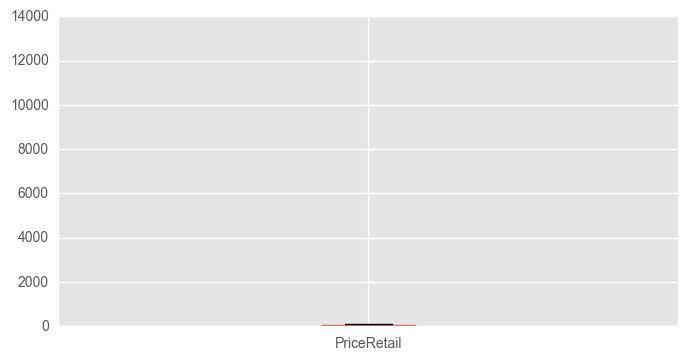

In [250]:
df.PriceRetail.plot(kind = 'box', figsize = (8, 4))

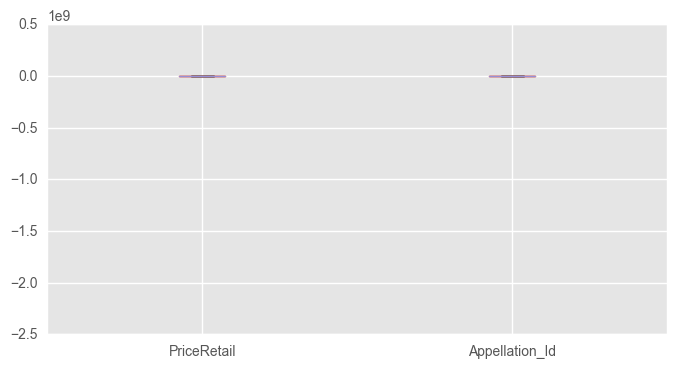

In [251]:
df[ ['PriceRetail', 'Appellation_Id'] ].plot(kind = 'box', figsize = (8, 4))

In [252]:
sorted(df['PriceRetail'], reverse = True)

[12819.0,
 11999.0,
 11839.0,
 9199.0,
 8995.0,
 7999.0,
 6824.4899999999998,
 6500.0,
 6000.0,
 4999.0,
 4499.0,
 4043.9899999999998,
 3999.9899999999998,
 3999.9899999999998,
 3999.0,
 3879.0,
 3799.0,
 3749.0,
 3699.0,
 3500.0,
 3499.0,
 3389.0,
 3300.0,
 3299.0,
 3289.0,
 3169.0,
 3159.0,
 3125.0,
 3100.0,
 3000.0,
 2999.0,
 2999.0,
 2999.0,
 2972.9899999999998,
 2875.0,
 2800.0,
 2799.0,
 2695.0,
 2500.0,
 2500.0,
 2500.0,
 2499.0,
 2499.0,
 2499.0,
 2426.9899999999998,
 2369.0,
 2299.0,
 2272.9899999999998,
 2250.0,
 2239.0,
 2233.9899999999998,
 2225.9899999999998,
 2166.9899999999998,
 2109.0,
 2079.9899999999998,
 2000.0,
 2000.0,
 2000.0,
 1999.99,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1999.0,
 1960.99,
 1959.99,
 1949.0,
 1900.0,
 1899.0,
 1899.0,
 1899.0,
 1861.99,
 1849.0,
 1848.99,
 1817.99,
 1800.0,
 1800.0,
 1799.99,
 1799.0,
 1799.0,
 1799.0,
 1799.0,
 1779.0,
 1749.99,
 1739.0,
 1739.0,
 1699.0,
 1699.0,
 1

In [253]:
(df['PriceRetail'] > 500).sum()

573

In [254]:
df['PriceRetail'].groupby(['Vintage', 'Varietal_Name'])['PriceRetail'].count()

KeyError: 'Vintage'

In [ ]:
df = df[df['PriceRetail'] =< 500]

In [ ]:
pd.tools.plotting.scatter_matrix(df[ ['PriceRetail'] ], s = 200, figsize = (8, 8))